## Problem Statement
Big data analytics allows you to analyse data at scale. It has applications in almost every industry in the world. Let’s consider an unconventional application that you wouldn’t ordinarily encounter.

New York City is a thriving metropolis. Just like most other metros its size, one of the biggest problems its citizens face is parking. The classic combination of a huge number of cars and cramped geography leads to a huge number of parking tickets.


In an attempt to scientifically analyse this phenomenon, the NYC Police Department has collected data for parking tickets. Of these, the data files for multiple years are publicly available on Kaggle. We will try and perform some exploratory analysis on a part of this data. Spark will allow us to analyse the full files at high speeds as opposed to taking a series of random samples that will approximate the population. For the scope of this analysis, we will analyse the parking tickets over the year 2017. 

### Brief: 
This Case Study is centered on the concepts of Ingesting and Analyzing big data on the PySpark platform. Spark will allow us to analyse the full files at high speeds, as opposed to taking a series of random samples that will approximate the population.

### Dataset: 
The dataset used for analysis consists of the Parking Violation Ticket details issued by the NYC Police Department for the year of  2017.

### Our Analysis is focussed on performing exploratory analysis to understand the parking violation dataset. 
- Stage 1: Data Quality Verification and Cleaning
- Stage 2: Overview and Examining the dataset
- Stage 3: Deriving and Comparing Metrics through Aggregation Tasks.

In [1]:
#Initializing the Spark session.
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Misc") \
    .getOrCreate()

In [2]:
#load csv file
df = spark.read.format("csv")\
  .option("header", "true")\
  .option("inferSchema", "true")\
  .load("/common_folder/nyc_parking/Parking_Violations_Issued_-_Fiscal_Year_2017.csv")

In [3]:
# Import all sql functions as F
import pyspark.sql.functions as F

In [4]:
# Check and confirm type of pyspark dataframe
type(df)

pyspark.sql.dataframe.DataFrame

In [5]:
# Display top 5 records from dataframe
df.show(5)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons Number|Plate ID|Registration State|         Issue Date|Violation Code|Vehicle Body Type|Vehicle Make|Violation Precinct|Issuer Precinct|Violation Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    5092469481| GZH7067|                NY|2016-07-10 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0143A|
|    5092451658| GZH7067|                NY|2016-07-08 00:00:00|             7|             SUBN|       TOYOT|                 0|              0|         0400P|
|    4006265037| FZX9232|                NY|2016-08-23 00:00:00|             5|             SUBN|        FORD|                 0|              0|         0233P|
|    8478629828| 66623ME|         

In [6]:
# Check total number of records in the dataframe
df.count()

10803028

In [7]:
# Check schema of the dataframe
df.printSchema()

root
 |-- Summons Number: long (nullable = true)
 |-- Plate ID: string (nullable = true)
 |-- Registration State: string (nullable = true)
 |-- Issue Date: timestamp (nullable = true)
 |-- Violation Code: integer (nullable = true)
 |-- Vehicle Body Type: string (nullable = true)
 |-- Vehicle Make: string (nullable = true)
 |-- Violation Precinct: integer (nullable = true)
 |-- Issuer Precinct: integer (nullable = true)
 |-- Violation Time: string (nullable = true)



In [8]:
# List the columns present in the dataframe
df.columns

['Summons Number',
 'Plate ID',
 'Registration State',
 'Issue Date',
 'Violation Code',
 'Vehicle Body Type',
 'Vehicle Make',
 'Violation Precinct',
 'Issuer Precinct',
 'Violation Time']

In [9]:
# Check number of records for each year present in the dataframe based on "Issue Date" filed
df.groupBy(F.year("Issue Date")).agg(F.count(F.year("Issue Date")).alias("Count")).sort(F.desc("Count")).show()

+----------------+-------+
|year(Issue Date)|  Count|
+----------------+-------+
|            2017|5431918|
|            2016|5368391|
|            2018|   1057|
|            2019|    472|
|            2015|    419|
|            2000|    185|
|            2014|    120|
|            2012|     87|
|            2013|     70|
|            2027|     50|
|            2010|     48|
|            2026|     24|
|            2011|     22|
|            2020|     22|
|            2021|     22|
|            2007|     18|
|            2030|     12|
|            2006|      8|
|            2028|      8|
|            2025|      6|
+----------------+-------+
only showing top 20 rows



#### Out of 10803028 records, only 5431918 records ( approx. 50% ) data are for the year 2017.
#### However, since the scope of the analyses is restriced to year 2017, we will keep only records that conform to this condition i.e., "Issue Date" is for the year 2017. All other records will be filtered out (left out from further analyses).

In [10]:
# Filter records only belonging to year 2017
nyc_2017 = df.filter(F.year("Issue Date") == 2017)

In [11]:
df.count()

10803028

In [12]:
nyc_2017.count()

5431918

Replace space with underscore in all column names for ease of usage.

In [13]:
for c in nyc_2017.columns:
    nyc_2017 = nyc_2017.withColumnRenamed(c,c.replace(" ","_"))

In [14]:
nyc_2017.printSchema()

root
 |-- Summons_Number: long (nullable = true)
 |-- Plate_ID: string (nullable = true)
 |-- Registration_State: string (nullable = true)
 |-- Issue_Date: timestamp (nullable = true)
 |-- Violation_Code: integer (nullable = true)
 |-- Vehicle_Body_Type: string (nullable = true)
 |-- Vehicle_Make: string (nullable = true)
 |-- Violation_Precinct: integer (nullable = true)
 |-- Issuer_Precinct: integer (nullable = true)
 |-- Violation_Time: string (nullable = true)



In [15]:
nyc_2017.show(5)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    8478629828| 66623ME|                NY|2017-06-14 00:00:00|            47|             REFG|       MITSU|                14|             14|         1120A|
|    5096917368| FZD8593|                NY|2017-06-13 00:00:00|             7|             SUBN|       ME/BE|                 0|              0|         0852P|
|    1407740258| 2513JMG|                NY|2017-01-11 00:00:00|            78|             DELV|       FRUEH|               106|            106|         0015A|
|    1413656420|T672371C|         

In [16]:
# Identify datatype of each of the columns
nyc_2017.dtypes

[('Summons_Number', 'bigint'),
 ('Plate_ID', 'string'),
 ('Registration_State', 'string'),
 ('Issue_Date', 'timestamp'),
 ('Violation_Code', 'int'),
 ('Vehicle_Body_Type', 'string'),
 ('Vehicle_Make', 'string'),
 ('Violation_Precinct', 'int'),
 ('Issuer_Precinct', 'int'),
 ('Violation_Time', 'string')]

In [17]:
# Print the summary statistics for all numerical attributes
nyc_2017.describe([i[0] for i in nyc_2017.dtypes if 'int' in i[1]]).toPandas()

,summary,Summons_Number,Violation_Code,Violation_Precinct,Issuer_Precinct
0,count,5431918,5431918,5431918,5431918
1,mean,7.116377503346856E9,35.05772196855696,45.86076593939747,47.68945646823093
2,stddev,2.2941358232098784E9,19.332822159461614,40.33149035442257,61.58776474573476
3,min,1002884949,0,0,0
4,max,8585600044,99,918,992


Inferences:
- Summons_Number : This is the identifier number for each of the tickets issued.
- Violation_Code : The code of the violation for which the ticket has been issued. Ranges from 0 to 99.
- Violation_Precinct : The code of the precinct in which the violation has occured.
- Issuer_Precinct : The code of the precinct which has issued the ticket for the violation.

In [18]:
nyc_2017.select(F.min("Issue_Date"), F.max("Issue_Date")).toPandas()

,min(Issue_Date),max(Issue_Date)
0,2017-01-01,2017-12-31


Only data corresponding to year 2017 (01-JAN-2017 to 31-DEC-2017) have been filtered out for further analyses. 

In [19]:
nyc_2017.distinct().count()

5431918

In [20]:
nyc_2017.count()

5431918

There are no duplicate records in the nyc_2017 dataframe.

In [21]:
nyc_2017.select('Summons_Number').distinct().count()

5431918

Summons_Number uniquely identifies each record in this dataset.

In [22]:
nyc_2017.select([F.count(F.when(F.isnull(c) , c)).alias(c) for c in nyc_2017.columns]).toPandas().rename(index={0:"Count"}).T

,Count
Summons_Number,0
Plate_ID,0
Registration_State,0
Issue_Date,0
Violation_Code,0
Vehicle_Body_Type,0
Vehicle_Make,0
Violation_Precinct,0
Issuer_Precinct,0
Violation_Time,0


#### Create temporary view of the dataframe for executing SQL like operations.

In [23]:
nyc_2017.createOrReplaceTempView("nyc_2017_Table")

In [24]:
spark.sql("select count(1) from nyc_2017_Table").show()

+--------+
|count(1)|
+--------+
| 5431918|
+--------+



In [25]:
spark.sql("select * from nyc_2017_Table limit 10").show()

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|Summons_Number|Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+
|    8534604575| GKU9062|                NY|2017-03-22 00:00:00|            20|             SUBN|        JEEP|                83|             83|         1210P|
|    8503253811|  2XG950|                OK|2017-01-21 00:00:00|            48|             DELV|       INTER|                 9|              9|         1002A|
|    8472121483| 10462MG|                NY|2017-02-17 00:00:00|            85|             DELV|       ISUZU|               108|            108|         0249A|
|    4629846669| DCT2148|         

--- 

### Examine the data

--- 

#### 1. Find the total number of tickets for the year.

In [26]:
nyc_2017.count()

5431918

In [27]:
spark.sql("select count(1) from nyc_2017_Table").show()

+--------+
|count(1)|
+--------+
| 5431918|
+--------+



#### Approximately 5.4 million tickets were issued for parking violation in NewYork city just in the year 2017!!!

--- 

#### 2. Find out the number of unique states from where the cars that got parking tickets came. (Hint: Use the column 'Registration State'.)

#### There is a numeric entry '99' in the column, which should be corrected. Replace it with the state having the maximum entries. Provide the number of unique states again.

In [28]:
nyc_2017.select('Registration_State').agg(F.countDistinct('Registration_State')\
                                          .alias('Distinct Count Registration_State')).show()

+---------------------------------+
|Distinct Count Registration_State|
+---------------------------------+
|                               65|
+---------------------------------+



In [29]:
nyc_2017.groupby(nyc_2017['Registration_State']).count().sort(F.desc('count')).show(100)

+------------------+-------+
|Registration_State|  count|
+------------------+-------+
|                NY|4273951|
|                NJ| 475825|
|                PA| 140286|
|                CT|  70403|
|                FL|  69468|
|                IN|  45525|
|                MA|  38941|
|                VA|  34367|
|                MD|  30213|
|                NC|  27152|
|                TX|  18827|
|                IL|  18666|
|                GA|  17537|
|                99|  16055|
|                AZ|  12379|
|                OH|  12281|
|                CA|  12153|
|                ME|  10806|
|                SC|  10395|
|                MN|  10083|
|                OK|   9088|
|                TN|   8514|
|                DE|   7905|
|                MI|   7231|
|                RI|   5814|
|                NH|   4119|
|                VT|   3683|
|                AL|   3178|
|                WA|   3052|
|                OR|   2622|
|                MO|   2483|
|             

Using Temporary View.

In [30]:
spark.sql("select count(distinct Registration_State) as `Distinct Count Registration_State` from nyc_2017_Table").show()

+---------------------------------+
|Distinct Count Registration_State|
+---------------------------------+
|                               65|
+---------------------------------+



In [31]:
spark.sql("select Registration_State, count(1) as `Count` from nyc_2017_Table group by 1 order by 2 desc").show(100)

+------------------+-------+
|Registration_State|  Count|
+------------------+-------+
|                NY|4273951|
|                NJ| 475825|
|                PA| 140286|
|                CT|  70403|
|                FL|  69468|
|                IN|  45525|
|                MA|  38941|
|                VA|  34367|
|                MD|  30213|
|                NC|  27152|
|                TX|  18827|
|                IL|  18666|
|                GA|  17537|
|                99|  16055|
|                AZ|  12379|
|                OH|  12281|
|                CA|  12153|
|                ME|  10806|
|                SC|  10395|
|                MN|  10083|
|                OK|   9088|
|                TN|   8514|
|                DE|   7905|
|                MI|   7231|
|                RI|   5814|
|                NH|   4119|
|                VT|   3683|
|                AL|   3178|
|                WA|   3052|
|                OR|   2622|
|                MO|   2483|
|             

#### Replace 99 with the state with the most number of violations i.e., NY

In [32]:
nyc_2017 = nyc_2017.\
    withColumn("Registration_State", F.when(nyc_2017["Registration_State"] == '99', 'NY').\
    otherwise(nyc_2017["Registration_State"]))

In [33]:
nyc_2017.groupby(nyc_2017['Registration_State']).count().sort(F.desc('count')).show(100)

+------------------+-------+
|Registration_State|  count|
+------------------+-------+
|                NY|4290006|
|                NJ| 475825|
|                PA| 140286|
|                CT|  70403|
|                FL|  69468|
|                IN|  45525|
|                MA|  38941|
|                VA|  34367|
|                MD|  30213|
|                NC|  27152|
|                TX|  18827|
|                IL|  18666|
|                GA|  17537|
|                AZ|  12379|
|                OH|  12281|
|                CA|  12153|
|                ME|  10806|
|                SC|  10395|
|                MN|  10083|
|                OK|   9088|
|                TN|   8514|
|                DE|   7905|
|                MI|   7231|
|                RI|   5814|
|                NH|   4119|
|                VT|   3683|
|                AL|   3178|
|                WA|   3052|
|                OR|   2622|
|                MO|   2483|
|                ON|   2460|
|             

In [34]:
# Number of unique states
nyc_2017.select('Registration_State').agg(F.countDistinct('Registration_State')\
                                          .alias('Distinct Count Registration_State')).show()

+---------------------------------+
|Distinct Count Registration_State|
+---------------------------------+
|                               64|
+---------------------------------+



Recreate the temporary view to reflect the changes that have been done on the dataframe.

In [35]:
nyc_2017.createOrReplaceTempView("nyc_2017_Table")

In [36]:
spark.sql("select count(distinct Registration_State) as `Distinct Count Registration_State` from nyc_2017_Table").show()

+---------------------------------+
|Distinct Count Registration_State|
+---------------------------------+
|                               64|
+---------------------------------+



In [37]:
spark.sql("select Registration_State, count(1) as `Count` from nyc_2017_Table group by 1 order by 2 desc").show(100)

+------------------+-------+
|Registration_State|  Count|
+------------------+-------+
|                NY|4290006|
|                NJ| 475825|
|                PA| 140286|
|                CT|  70403|
|                FL|  69468|
|                IN|  45525|
|                MA|  38941|
|                VA|  34367|
|                MD|  30213|
|                NC|  27152|
|                TX|  18827|
|                IL|  18666|
|                GA|  17537|
|                AZ|  12379|
|                OH|  12281|
|                CA|  12153|
|                ME|  10806|
|                SC|  10395|
|                MN|  10083|
|                OK|   9088|
|                TN|   8514|
|                DE|   7905|
|                MI|   7231|
|                RI|   5814|
|                NH|   4119|
|                VT|   3683|
|                AL|   3178|
|                WA|   3052|
|                OR|   2622|
|                MO|   2483|
|                ON|   2460|
|             

---

### Aggregation tasks

### 1.How often does each violation code occur? Display the frequency of the top five violation codes.

In [38]:
nyc_2017.groupby(nyc_2017['Violation_Code']).count().sort(F.desc('count')).show(5)

+--------------+------+
|Violation_Code| count|
+--------------+------+
|            21|768087|
|            36|662765|
|            38|542079|
|            14|476664|
|            20|319646|
+--------------+------+
only showing top 5 rows



Using TempView

In [39]:
spark.sql("select Violation_Code , count(1) from nyc_2017_Table group by 1 order by 2 desc limit 5").show()

+--------------+--------+
|Violation_Code|count(1)|
+--------------+--------+
|            21|  768087|
|            36|  662765|
|            38|  542079|
|            14|  476664|
|            20|  319646|
+--------------+--------+



In [40]:
import matplotlib.pyplot as plt 
%matplotlib inline

<Figure size 432x288 with 0 Axes>

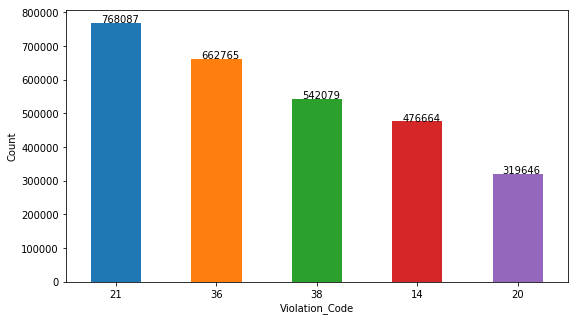

In [41]:
plt.figure()

ax1=nyc_2017.groupby(nyc_2017['Violation_Code']).count().sort(F.desc('count')).limit(5)\
.toPandas()\
.plot(x='Violation_Code',y='count',kind='bar',rot=0,legend=False,figsize=(9,5))

for i in ax1.patches:
    ax1.text(i.get_x()+.1, i.get_height()+1000, \
            str(i.get_height()))

plt.ylabel("Count")
plt.show()

The top 5 violations by type of Violation Code are:
    1. Street Cleaning (Code 21)
    2. Exceeding the posted speed limit in or near a designated school zone (Code 36)
    3. Parking Meter -- Failing to show a receipt or tag in the windshield (Code 38)
    4. General No Standing (Code 14)
    5. General No Parking (Code 20)
   
Source : https://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page

--- 

### 2. How often does each 'vehicle body type' get a parking ticket? How about the 'vehicle make'? (Hint: Find the top 5 for both.)

##### Vehicle_Body_Type

In [42]:
nyc_2017.groupby(nyc_2017['Vehicle_Body_Type']).count().sort(F.desc('count')).show(5)

+-----------------+-------+
|Vehicle_Body_Type|  count|
+-----------------+-------+
|             SUBN|1883954|
|             4DSD|1547312|
|              VAN| 724029|
|             DELV| 358984|
|              SDN| 194197|
+-----------------+-------+
only showing top 5 rows



In [43]:
spark.sql("select Vehicle_Body_Type , count(1) from nyc_2017_Table group by 1 order by 2 desc limit 5").show()

+-----------------+--------+
|Vehicle_Body_Type|count(1)|
+-----------------+--------+
|             SUBN| 1883954|
|             4DSD| 1547312|
|              VAN|  724029|
|             DELV|  358984|
|              SDN|  194197|
+-----------------+--------+



<Figure size 432x288 with 0 Axes>

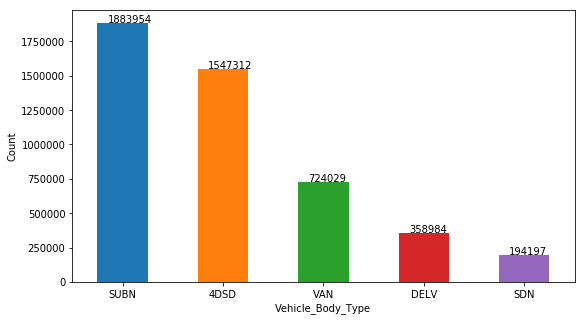

In [44]:
plt.figure()

ax2=nyc_2017.groupby(nyc_2017['Vehicle_Body_Type']).count().sort(F.desc('count')).limit(5)\
.toPandas()\
.plot(x='Vehicle_Body_Type',y='count',kind='bar',rot=0,legend=False,figsize=(9,5))

for i in ax2.patches:
    ax2.text(i.get_x()+.1, i.get_height()+4000, \
            str(i.get_height()))

plt.ylabel("Count")
plt.show()

The top 5 violations by type of Vehicle Body Type are:
    1. Suburban Cars (Code : SUBN)
    2. Four Door Sedan (Code : 4DSD)
    3. Van Truck (Code : VAN)
    4. Delivery Truck (Code : DELV)
    5. Sedan (Code : SDN) -- This is an approximate guess as this code was not found in the data-dict mentioned below.
   
Source : https://data.ny.gov/api/assets/83055271-29A6-4ED4-9374-E159F30DB5AE

##### Vehicle_Make

In [45]:
nyc_2017.groupby(nyc_2017['Vehicle_Make']).count().sort(F.desc('count')).show(5)

+------------+------+
|Vehicle_Make| count|
+------------+------+
|        FORD|636844|
|       TOYOT|605291|
|       HONDA|538884|
|       NISSA|462017|
|       CHEVR|356032|
+------------+------+
only showing top 5 rows



In [46]:
spark.sql("select Vehicle_Make , count(1) from nyc_2017_Table group by 1 order by 2 desc limit 5").show()

+------------+--------+
|Vehicle_Make|count(1)|
+------------+--------+
|        FORD|  636844|
|       TOYOT|  605291|
|       HONDA|  538884|
|       NISSA|  462017|
|       CHEVR|  356032|
+------------+--------+



<Figure size 432x288 with 0 Axes>

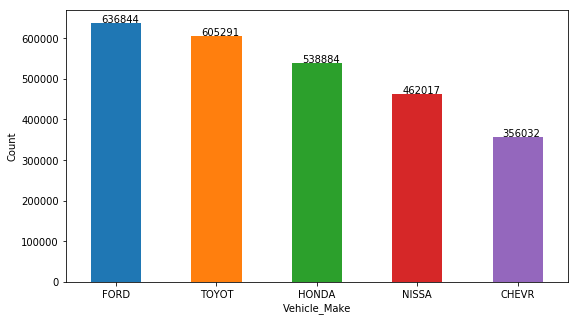

In [47]:
plt.figure()

ax3=nyc_2017.groupby(nyc_2017['Vehicle_Make']).count().sort(F.desc('count')).limit(5)\
.toPandas()\
.plot(x='Vehicle_Make',y='count',kind='bar',rot=0,legend=False,figsize=(9,5))

for i in ax3.patches:
    ax3.text(i.get_x()+.1, i.get_height()+2000, \
            str(i.get_height()))

plt.ylabel("Count")
plt.show()

The top 5 violations by Vehicle Make are:
    1. FORD
    2. TOYOTA
    3. HONDA
    4. NISSAN
    5. CHEVROLET
    

--- 

### 3. A precinct is a police station that has a certain zone of the city under its command. Find the (5 highest) frequencies of tickets for each of the following:

##### 3.1 'Violation Precinct' (This is the precinct of the zone where the violation occurred). Using this, can you draw any insights for parking violations in any specific areas of the city?

In [48]:
nyc_2017.groupby(nyc_2017['Violation_Precinct']).count().sort(F.desc('count')).show(6)

+------------------+------+
|Violation_Precinct| count|
+------------------+------+
|                 0|925596|
|                19|274445|
|                14|203553|
|                 1|174702|
|                18|169131|
|               114|147444|
+------------------+------+
only showing top 6 rows



In [49]:
# Excluding Precinct 0 , which is a known erroneous data
nyc_2017.filter(nyc_2017['Violation_Precinct']!='0').\
   groupby(nyc_2017['Violation_Precinct']).count().\
   sort(F.desc('count')).show(5)

+------------------+------+
|Violation_Precinct| count|
+------------------+------+
|                19|274445|
|                14|203553|
|                 1|174702|
|                18|169131|
|               114|147444|
+------------------+------+
only showing top 5 rows



In [50]:
query = """
select Violation_Precinct, count(1) as COUNT
from nyc_2017_Table
group by 1
order by 2 desc
limit 6
"""
spark.sql(query).show()

+------------------+------+
|Violation_Precinct| COUNT|
+------------------+------+
|                 0|925596|
|                19|274445|
|                14|203553|
|                 1|174702|
|                18|169131|
|               114|147444|
+------------------+------+



In [51]:
# Excluding Precinct 0 , which is a known erroneous data
query = """
select Violation_Precinct, count(1) as COUNT
from nyc_2017_Table
where Violation_Precinct != 0
group by 1
order by 2 desc
limit 5
"""
spark.sql(query).show()

+------------------+------+
|Violation_Precinct| COUNT|
+------------------+------+
|                19|274445|
|                14|203553|
|                 1|174702|
|                18|169131|
|               114|147444|
+------------------+------+



The top 5 violations by valid Violation Precinct are:
    1. Upper East Side of Manhattan (Code : 19)
    2. Midtown South Precinct, Manhattan (Code : 14)
    3. Southernmost tip of Manhattan (Code : 1)
    4. Midtown, Manhattan south of Central Park(Code : 18)
    5. Northwestern portion of Queens(Code : 114)

Source : https://www1.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page

##### 3.2. 'Issuer Precinct' (This is the precinct that issued the ticket.)

In [52]:
nyc_2017.groupby(nyc_2017['Issuer_Precinct']).count().sort(F.desc('count')).show(6)

+---------------+-------+
|Issuer_Precinct|  count|
+---------------+-------+
|              0|1078406|
|             19| 266961|
|             14| 200495|
|              1| 168740|
|             18| 162994|
|            114| 144054|
+---------------+-------+
only showing top 6 rows



In [53]:
# Excluding Precinct 0 , which is a known erroneous data
nyc_2017.filter(nyc_2017['Issuer_Precinct']!='0').\
   groupby(nyc_2017['Issuer_Precinct']).count().\
   sort(F.desc('count')).show(5)

+---------------+------+
|Issuer_Precinct| count|
+---------------+------+
|             19|266961|
|             14|200495|
|              1|168740|
|             18|162994|
|            114|144054|
+---------------+------+
only showing top 5 rows



In [54]:
query = """
select Issuer_Precinct, count(1) as COUNT
from nyc_2017_Table
group by 1
order by 2 desc
limit 6
"""
spark.sql(query).show()

+---------------+-------+
|Issuer_Precinct|  COUNT|
+---------------+-------+
|              0|1078406|
|             19| 266961|
|             14| 200495|
|              1| 168740|
|             18| 162994|
|            114| 144054|
+---------------+-------+



In [55]:
# Excluding Precinct 0 , which is a known erroneous data
query = """
select Issuer_Precinct, count(1) as COUNT
from nyc_2017_Table
where Issuer_Precinct != 0
group by 1
order by 2 desc
limit 5
"""
spark.sql(query).show()

+---------------+------+
|Issuer_Precinct| COUNT|
+---------------+------+
|             19|266961|
|             14|200495|
|              1|168740|
|             18|162994|
|            114|144054|
+---------------+------+



The top 6 violations by Issuer Precinct are:
    1. Upper East Side of Manhattan (Code : 19)
    2. Midtown South Precinct, Manhattan (Code : 14)
    3. Southernmost tip of Manhattan (Code : 1)
    4. Midtown, Manhattan south of Central Park(Code : 18)
    5. Northwestern portion of Queens(Code : 114)

Source : https://www1.nyc.gov/site/nypd/bureaus/patrol/precincts-landing.page

--- 

**The Violation Precinct indicates the precinct(area) in which the violation happened and the Issuer Precinct indicates the precinct which issued the ticket. The top 5 in both these categories are the same precincts, meaning the officers attached to a precinct issue tickets to the vehicles violating the rule in their own precincts(areas) most of the time.**

**Also, we notice that the area around Midtown Manhattan and Queens(opposite side of Midtown Manhattan) have the highest number of tickets. This is probably due to fact that the mentioned area is having a lot of commercial buildings, office, restaurents etc. leading to many parking violations.**

** Although, there are a lot of invalid precinct codes in both Violation Precinct and Issuer Precinct, we are assuming that these are issues due to incorrect data capturing and a workaround  can be done to correctly impute these invalid precincts with valid precincts. Hence, we are not removing records which are having invalid precincts (Violation or Issuer) which constitute almost 20% of the data. **

---

### 4. Find the violation code frequencies for three precincts that have issued the most number of tickets. Do these precinct zones have an exceptionally high frequency of certain violation codes? Are these codes common across precincts? 

The top 3 Issuer_Precincts are : 19, 14 and 1.

In [56]:
query = """
SELECT 
Violation_Code,
count(Violation_Code) as Count 
FROM nyc_2017_Table WHERE Issuer_Precinct IN ('19', '14', '1')
GROUP BY Violation_Code
ORDER BY Count DESC
"""
spark.sql(query).show()

+--------------+------+
|Violation_Code| Count|
+--------------+------+
|            14|113187|
|            46| 68869|
|            38| 48190|
|            37| 43782|
|            69| 39046|
|            21| 33499|
|            20| 32798|
|            31| 30488|
|            16| 29947|
|            40| 19590|
|            19| 19262|
|            47| 19098|
|            84| 14963|
|            71| 13831|
|            42| 13638|
|            17| 12524|
|            10| 11674|
|            70|  8103|
|            82|  6715|
|            48|  5806|
+--------------+------+
only showing top 20 rows



The top 5 violations by violation code in the three precincts that have issued the highest number of tickets are:
    1. General No Standing (Code 14)
    2. Double Parking (Code 46)
    3. Failing to show a receipt or tag in the windshield (Code 38)
    4. Parking in excess of the allowed time (Code 37)
    5. Parking in front of a pedestrian ramp (Code 69)

#### Violation_Code by Precinct

In [57]:
query = """
SELECT 
Issuer_Precinct,
Violation_Code, 
count(2) as Count 
FROM nyc_2017_Table 
WHERE Issuer_Precinct = '19'
GROUP BY Issuer_Precinct , Violation_Code
ORDER BY Count DESC
limit 5
"""
spark.sql(query).show()

+---------------+--------------+-----+
|Issuer_Precinct|Violation_Code|Count|
+---------------+--------------+-----+
|             19|            46|48445|
|             19|            38|36386|
|             19|            37|36056|
|             19|            14|29797|
|             19|            21|28415|
+---------------+--------------+-----+



In [58]:
query = """
SELECT 
Issuer_Precinct,
Violation_Code, 
count(2) as Count 
FROM nyc_2017_Table 
WHERE Issuer_Precinct = '14'
GROUP BY Issuer_Precinct , Violation_Code
ORDER BY Count DESC
limit 5
"""
spark.sql(query).show()

+---------------+--------------+-----+
|Issuer_Precinct|Violation_Code|Count|
+---------------+--------------+-----+
|             14|            14|45036|
|             14|            69|30464|
|             14|            31|22555|
|             14|            47|18364|
|             14|            42|10027|
+---------------+--------------+-----+



In [59]:
query = """
SELECT 
Issuer_Precinct,
Violation_Code, 
count(2) as Count 
FROM nyc_2017_Table 
WHERE Issuer_Precinct = '1'
GROUP BY Issuer_Precinct , Violation_Code
ORDER BY Count DESC
limit 5
"""
spark.sql(query).show()

+---------------+--------------+-----+
|Issuer_Precinct|Violation_Code|Count|
+---------------+--------------+-----+
|              1|            14|38354|
|              1|            16|19081|
|              1|            20|15408|
|              1|            46|12745|
|              1|            38| 8535|
+---------------+--------------+-----+



**Violation_Code 14 - "General No Standing"** appears in top 5 violations in the 3 precincts that have issued the highest number of tickets.

This seems to be a very common violation in the 3 percinctsthat have issued the highest number of tickets.

--- 

### 5.Find out the properties of parking violations across different times of the day:

- Find a way to deal with missing values, if any.
(Hint: Check for the null values using 'isNull' under the SQL. Also, to remove the null values, check the 'dropna' command in the API documentation.)

In [60]:
for c in nyc_2017.columns:
    _ = nyc_2017.filter(nyc_2017[c].isNull()).count()
    print("Column name {:20} has {} null Values".format(c,_))

Column name Summons_Number       has 0 null Values
Column name Plate_ID             has 0 null Values
Column name Registration_State   has 0 null Values
Column name Issue_Date           has 0 null Values
Column name Violation_Code       has 0 null Values
Column name Vehicle_Body_Type    has 0 null Values
Column name Vehicle_Make         has 0 null Values
Column name Violation_Precinct   has 0 null Values
Column name Issuer_Precinct      has 0 null Values
Column name Violation_Time       has 0 null Values


In [61]:
for c in nyc_2017.columns:
    _ = nyc_2017.filter(nyc_2017[c]=='nan').count()
    print("Column name {:20} has {} with 'nan' string.".format(c,_))

Column name Summons_Number       has 0 with 'nan' string.
Column name Plate_ID             has 252 with 'nan' string.
Column name Registration_State   has 0 with 'nan' string.
Column name Issue_Date           has 0 with 'nan' string.
Column name Violation_Code       has 0 with 'nan' string.
Column name Vehicle_Body_Type    has 20201 with 'nan' string.
Column name Vehicle_Make         has 38509 with 'nan' string.
Column name Violation_Precinct   has 0 with 'nan' string.
Column name Issuer_Precinct      has 0 with 'nan' string.
Column name Violation_Time       has 16 with 'nan' string.


Currently we are analyzing only the Violation_Time column which has 16 entries with 'nan' string.

Apart from this, the Violation_Time field is specified in a strange format. We need to find a way to make this a time attribute that can be used to divide into 6 timezone groups.

The pattern that is found in the Violation_Time column is **2-digit Hours (HH)** followed by **2-digit Minutes (MM)** and finally ends with **A meaning AM** or **P meaning PM**.

Lets check the distinct values found in the last character of the string.

In [62]:
query="""
select distinct(substr(Violation_Time,5,1)) 
from nyc_2017_Table 
"""
spark.sql(query).show()

+-------------------------------+
|substring(Violation_Time, 5, 1)|
+-------------------------------+
|                              0|
|                              A|
|                              P|
|                               |
+-------------------------------+



There are characters other thna 'A' and 'P' which are erroneous and will have to be discarded.

Lets check the distinct hours for both AM and PM 

In [64]:
query="""
select distinct (substr(Violation_Time,1,2)) as `AM Hours`, count(1) as count
from nyc_2017_Table 
where substr(Violation_Time,5,1) = 'A'
group by 1
order by 1
"""
spark.sql(query).show()

+--------+------+
|AM Hours| count|
+--------+------+
|      .9|     1|
|      0.|     1|
|      00| 28463|
|      01| 46069|
|      02| 40312|
|      03| 32453|
|      04| 14545|
|      05| 43154|
|      06|121552|
|      07|270629|
|      08|503846|
|      09|595631|
|      10|489457|
|      11|574632|
|      12| 17236|
+--------+------+



Records with hour as .9 and 0. are erroneous. Also, we see that there are 17236 records with Hour as 12 which may actually be implying Hour 00.

In [65]:
query="""
select distinct(substr(Violation_Time,1,2)) as `PM Hours`, count(1) as count
from nyc_2017_Table 
where substr(Violation_Time,5,1) = 'P'
group by 1
order by 1
"""
spark.sql(query).show()

+--------+------+
|PM Hours| count|
+--------+------+
|      00|   119|
|      01|549287|
|      02|466068|
|      03|314468|
|      04|295983|
|      05|211173|
|      06|104284|
|      07| 26100|
|      08| 49221|
|      09| 55322|
|      10| 42540|
|      11| 29277|
|      12|510016|
|      13|     2|
|      15|     3|
|      16|     3|
|      17|     1|
|      18|     1|
|      21|     1|
|      22|     2|
+--------+------+
only showing top 20 rows



We see that the PM hours have been represented bith in 12-HOur format and 24-Hour format. We need to bring all the Hours in a single 24-hour format

In [66]:
query="""
select distinct(substr(Violation_Time,3,2)) as Minutes , count(1) as count
from nyc_2017_Table 
group by 1
order by 1
"""
spark.sql(query).show(100)

+-------+------+
|Minutes| count|
+-------+------+
|     +0|     1|
|     +1|     2|
|     +2|     1|
|     +7|     1|
|     .0|     1|
|     .3|     1|
|     .5|     3|
|     .8|     1|
|     0+|     1|
|     0.|     1|
|     00| 95551|
|     01| 81723|
|     02| 81004|
|     03| 81299|
|     04| 80296|
|     05| 89395|
|     06|109710|
|     07|100790|
|     08|100697|
|     09| 99161|
|     1*|     1|
|     1/|     1|
|     10|109050|
|     11| 97176|
|     12| 97623|
|     13| 95119|
|     14| 93988|
|     15|104051|
|     16| 93066|
|     17| 92277|
|     18| 91380|
|     19| 89626|
|     20| 99510|
|     21| 87979|
|     22| 87605|
|     23| 86815|
|     24| 85382|
|     25| 92402|
|     26| 83086|
|     27| 82720|
|     28| 82879|
|     29| 80110|
|     3+|     2|
|     3.|     1|
|     3/|     2|
|     30| 93879|
|     31| 80296|
|     32| 79956|
|     33| 79776|
|     34| 79384|
|     35| 87324|
|     36|104782|
|     37| 95431|
|     38| 97230|
|     39| 95844|
|     4/|     

We see few records with speacial characters in the Minutes part of the string. These will be considerd as erroneous and discarded.

Considering the above results, the following inferences and assumptions are made with respect to the Violation_Time field:
    1. A last character of the string is used to identify AM or PM. Hence, it is assumed that the time entered in the first 4 characters follows a 12-Hour time format (Source: https://en.wikipedia.org/wiki/12-hour_clock) .
       For ex.: Morning 10 hours and 15 minutes will be represented as 1015A
                Evening 5 Hours and 30 minutes will be represented as 0530P and so on.
    2. As such, the first two characters can have digits between 00 and 11. 
       The next two characters can have values between 00 and 59.
       The last character can have values either A or P.
    3. Notice that there are reocrds with Hour as 12 for AM. 
       These will be assumed to be same as 00 AM as transformed accordingly ( replacing 12 by 00).
    4. Notice that some of the PM hours have been represented in 24-Hour Format (13-23). 
       To bring uniformity, all the PM hours will be converted to 24-Hour format by transforming accordingly 
       (If hour < 12, then add 12).
    5. Any data which violates the above condition would be considered as erroneous and filtered out (left-out) from further analyses.

#### Filter out erroneous records and save back to dataframe

In [67]:
am_hours= tuple([format(x,'02d') for x in range(0,13)])
pm_hours= tuple([format(x,'02d') for x in range(0,24)])
min_string = tuple([format(x,'02d') for x in range(0,60)])
query="""
select *
from nyc_2017_Table 
where ( substr(Violation_Time,5,1) = 'A' and substr(Violation_Time,1,2) in {} or
        substr(Violation_Time,5,1) = 'P' and substr(Violation_Time,1,2) in {})
and substr(Violation_Time,5,1) in ('A','P')
and substr(Violation_Time,3,2) in {}
""".format(am_hours,pm_hours,min_string)
nyc_2017 = spark.sql(query)

#### Check if the erroneous records have been filtered out 

In [68]:
type(nyc_2017)

pyspark.sql.dataframe.DataFrame

In [69]:
nyc_2017.count()

5431823

#### 95 erroneous records have been removed.

In [70]:
nyc_2017.createOrReplaceTempView("nyc_2017_Table")

In [71]:
query="""
select distinct(substr(Violation_Time,5,1)) 
from nyc_2017_Table 
"""
spark.sql(query).show()

+-------------------------------+
|substring(Violation_Time, 5, 1)|
+-------------------------------+
|                              A|
|                              P|
+-------------------------------+



In [72]:
query="""
select distinct (substr(Violation_Time,1,2)) as `AM Hours`, count(1) as count
from nyc_2017_Table 
where substr(Violation_Time,5,1) = 'A'
group by 1
order by 1
""".format(am_hours)
spark.sql(query).show()

+--------+------+
|AM Hours| count|
+--------+------+
|      00| 28463|
|      01| 46068|
|      02| 40312|
|      03| 32453|
|      04| 14545|
|      05| 43154|
|      06|121550|
|      07|270626|
|      08|503843|
|      09|595625|
|      10|489456|
|      11|574630|
|      12| 17235|
+--------+------+



In [73]:
query="""
select distinct(substr(Violation_Time,1,2)) as `PM Hours`, count(1) as count
from nyc_2017_Table 
where substr(Violation_Time,5,1) = 'P'
group by 1
order by 1
"""
spark.sql(query).show()

+--------+------+
|PM Hours| count|
+--------+------+
|      00|   119|
|      01|549287|
|      02|466068|
|      03|314468|
|      04|295983|
|      05|211173|
|      06|104283|
|      07| 26099|
|      08| 49221|
|      09| 55321|
|      10| 42536|
|      11| 29277|
|      12|510015|
|      13|     2|
|      15|     3|
|      16|     3|
|      17|     1|
|      18|     1|
|      21|     1|
|      22|     2|
+--------+------+



In [74]:
query="""
select distinct(substr(Violation_Time,3,2)) as Minutes , count(1) as count
from nyc_2017_Table 
group by 1
order by 1
"""
spark.sql(query).show(100)

+-------+------+
|Minutes| count|
+-------+------+
|     00| 95551|
|     01| 81723|
|     02| 81002|
|     03| 81298|
|     04| 80296|
|     05| 89393|
|     06|109709|
|     07|100790|
|     08|100696|
|     09| 99161|
|     10|109050|
|     11| 97174|
|     12| 97623|
|     13| 95119|
|     14| 93988|
|     15|104047|
|     16| 93064|
|     17| 92277|
|     18| 91380|
|     19| 89626|
|     20| 99508|
|     21| 87979|
|     22| 87602|
|     23| 86814|
|     24| 85380|
|     25| 92400|
|     26| 83086|
|     27| 82720|
|     28| 82878|
|     29| 80110|
|     30| 93878|
|     31| 80296|
|     32| 79955|
|     33| 79775|
|     34| 79384|
|     35| 87323|
|     36|104781|
|     37| 95430|
|     38| 97229|
|     39| 95843|
|     40|106674|
|     41| 94475|
|     42| 94381|
|     43| 93327|
|     44| 91668|
|     45|101702|
|     46| 90418|
|     47| 90029|
|     48| 89331|
|     49| 87219|
|     50| 99165|
|     51| 86080|
|     52| 86424|
|     53| 84185|
|     54| 83204|
|     55| 8956

#### Replace 12XX with 00XX if the last character is 'A'
#### Convert 12-hour to 24-Hour format by adding 12 to Hour if the last character is 'P' and hour is less than 12.

In [75]:
query="""
select * ,
CASE WHEN (substr(Violation_Time,5,1) = 'A' AND 
           cast(substr(Violation_Time,1,2) as int) = 12) THEN '00'
     WHEN (substr(Violation_Time,5,1) = 'P' AND
           cast(substr(Violation_Time,1,2) as int) < 12 ) THEN cast(substr(Violation_Time,1,2) as int) + 12 
     ELSE ( substr(Violation_Time,1,2) ) 
END as Violation_Hour
from nyc_2017_Table
"""
nyc_2017 = spark.sql(query)

In [76]:
nyc_2017.show(20)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+--------------+
|Summons_Number|Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|Violation_Hour|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+--------------+
|    8478629828| 66623ME|                NY|2017-06-14 00:00:00|            47|             REFG|       MITSU|                14|             14|         1120A|            11|
|    5096917368| FZD8593|                NY|2017-06-13 00:00:00|             7|             SUBN|       ME/BE|                 0|              0|         0852P|            20|
|    1407740258| 2513JMG|                NY|2017-01-11 00:00:00|            78|             DELV|       FRUEH|          

In [77]:
nyc_2017.createOrReplaceTempView("nyc_2017_Table")

In [78]:
query="""
select distinct Violation_Hour from nyc_2017_Table
order by 1
"""
spark.sql(query).show(30)

+--------------+
|Violation_Hour|
+--------------+
|            00|
|            01|
|            02|
|            03|
|            04|
|            05|
|            06|
|            07|
|            08|
|            09|
|            10|
|            11|
|            12|
|            13|
|            14|
|            15|
|            16|
|            17|
|            18|
|            19|
|            20|
|            21|
|            22|
|            23|
+--------------+



In [79]:
nyc_2017.groupby(nyc_2017['Violation_Hour']).count().sort(F.asc('Violation_Hour')).show(24)

+--------------+------+
|Violation_Hour| count|
+--------------+------+
|            00| 45698|
|            01| 46068|
|            02| 40312|
|            03| 32453|
|            04| 14545|
|            05| 43154|
|            06|121550|
|            07|270626|
|            08|503843|
|            09|595625|
|            10|489456|
|            11|574630|
|            12|510134|
|            13|549289|
|            14|466068|
|            15|314471|
|            16|295986|
|            17|211174|
|            18|104284|
|            19| 26099|
|            20| 49221|
|            21| 55322|
|            22| 42538|
|            23| 29277|
+--------------+------+



In [80]:
spark.sql("select Violation_Hour , count(1) as count from nyc_2017_Table group by 1 order by 1 asc ").show(24)

+--------------+------+
|Violation_Hour| count|
+--------------+------+
|            00| 45698|
|            01| 46068|
|            02| 40312|
|            03| 32453|
|            04| 14545|
|            05| 43154|
|            06|121550|
|            07|270626|
|            08|503843|
|            09|595625|
|            10|489456|
|            11|574630|
|            12|510134|
|            13|549289|
|            14|466068|
|            15|314471|
|            16|295986|
|            17|211174|
|            18|104284|
|            19| 26099|
|            20| 49221|
|            21| 55322|
|            22| 42538|
|            23| 29277|
+--------------+------+



<Figure size 432x288 with 0 Axes>

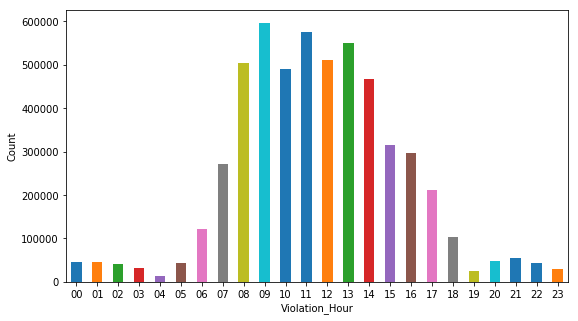

In [81]:
plt.figure()

ax4=nyc_2017.groupby(nyc_2017['Violation_Hour']).count().sort(F.asc('Violation_Hour'))\
.toPandas()\
.plot(x='Violation_Hour',y='count',kind='bar',rot=0,legend=False,figsize=(9,5))

plt.ylabel("Count")
plt.show()

- Notice the number of parking tickets gradually increase from 5AM and peaks around 9AM probably due to people coming for work.
- Further, notice a small peak at 11AM again more people coming for work and another at 1PM probably moving around for lunch.
- Post 1PM, the number of parking tickets gradually start dropping.
- Around 7PM, the number of tickets drop drasically probably as many people have already left and a lot of valid parking spaces are available at that time.
- Given the pattern of parking tickets, we can bin then into 6 groups each consisting of 4 hours as follows:
    - 00AM_to_03AM
    - 04AM_to_07AM
    - 08AM_to_11AM
    - 12PM_to_15PM
    - 16PM_to_19PM
    - 20PM_to_23PM

In [82]:
query = """
SELECT *,
CASE WHEN cast(Violation_Hour as int) BETWEEN 0  AND 3  THEN '00_03'
     WHEN cast(Violation_Hour as int) BETWEEN 4  AND 7  THEN '04_07'
     WHEN cast(Violation_Hour as int) BETWEEN 8  AND 11 THEN '08_11'
     WHEN cast(Violation_Hour as int) BETWEEN 12 AND 15 THEN '12_15'
     WHEN cast(Violation_Hour as int) BETWEEN 16 AND 19 THEN '16_19'
     WHEN cast(Violation_Hour as int) BETWEEN 20 AND 23 THEN '20_23'     
END AS Violation_Hour_Bin
FROM nyc_2017_Table
"""
nyc_2017 = spark.sql(query)

In [83]:
nyc_2017.show(10)

+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+--------------+------------------+
|Summons_Number|Plate_ID|Registration_State|         Issue_Date|Violation_Code|Vehicle_Body_Type|Vehicle_Make|Violation_Precinct|Issuer_Precinct|Violation_Time|Violation_Hour|Violation_Hour_Bin|
+--------------+--------+------------------+-------------------+--------------+-----------------+------------+------------------+---------------+--------------+--------------+------------------+
|    8478629828| 66623ME|                NY|2017-06-14 00:00:00|            47|             REFG|       MITSU|                14|             14|         1120A|            11|             08_11|
|    5096917368| FZD8593|                NY|2017-06-13 00:00:00|             7|             SUBN|       ME/BE|                 0|              0|         0852P|            20|             20_23|
|    1407740258| 2513JMG|

In [84]:
nyc_2017.createOrReplaceTempView("nyc_2017_Table")

In [86]:
nyc_2017.groupby(nyc_2017['Violation_Hour_Bin']).count().sort(F.asc('Violation_Hour_Bin')).show(6)

+------------------+-------+
|Violation_Hour_Bin|  count|
+------------------+-------+
|             00_03| 164531|
|             04_07| 449875|
|             08_11|2163554|
|             12_15|1839962|
|             16_19| 637543|
|             20_23| 176358|
+------------------+-------+



<Figure size 432x288 with 0 Axes>

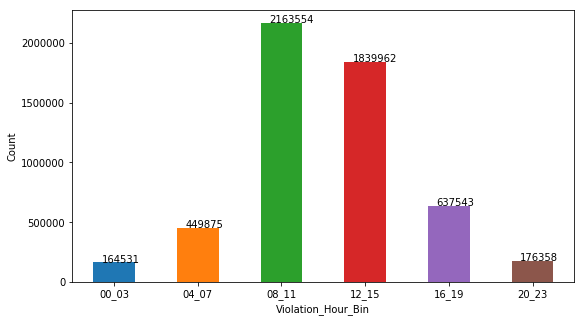

In [87]:
plt.figure()

ax5=nyc_2017.groupby(nyc_2017['Violation_Hour_Bin']).count().sort(F.asc('Violation_Hour_Bin'))\
.toPandas()\
.plot(x='Violation_Hour_Bin',y='count',kind='bar',rot=0,legend=False,figsize=(9,5))

for i in ax5.patches:
    ax5.text(i.get_x()+.1, i.get_height()+2000, \
            str(i.get_height()))

plt.ylabel("Count")
plt.show()

As inferred earlier, the hours between 8AM to 11AM see the most number of tickets followed by 12PM to 3PM.

#### For each of these groups, find the three most commonly occurring violations.

In [88]:
query = """
SELECT Violation_Hour_Bin,
Violation_Code,
Frequency_of_Tickets
FROM (SELECT Violation_Hour_Bin, Violation_Code, Frequency_of_Tickets, dense_rank() 
      over (partition by Violation_Hour_Bin order by Frequency_of_Tickets desc) Rnk
      FROM (SELECT Violation_Hour_Bin, Violation_Code, count(*) as Frequency_of_Tickets
            FROM nyc_2017_Table
            GROUP BY Violation_Hour_Bin,Violation_Code
            )
      )
WHERE Rnk <= 3
ORDER BY 1 asc,3 desc
"""
spark.sql(query).show()

+------------------+--------------+--------------------+
|Violation_Hour_Bin|Violation_Code|Frequency_of_Tickets|
+------------------+--------------+--------------------+
|             00_03|            21|               36957|
|             00_03|            40|               25865|
|             00_03|            78|               15528|
|             04_07|            14|               74113|
|             04_07|            40|               60652|
|             04_07|            21|               57894|
|             08_11|            21|              598062|
|             08_11|            36|              348165|
|             08_11|            38|              176570|
|             12_15|            36|              286284|
|             12_15|            38|              240721|
|             12_15|            37|              167026|
|             16_19|            38|              102855|
|             16_19|            14|               75902|
|             16_19|           

####  For the three most commonly occurring violation codes, find the most common time of the day (in terms of the bins from the previous part).

In [89]:
query="""
select Violation_Code, count(1) Number_of_Violations
from nyc_2017_Table
group by 1
order by 2 desc
"""
spark.sql(query).show(3)

+--------------+--------------------+
|Violation_Code|Number_of_Violations|
+--------------+--------------------+
|            21|              768053|
|            36|              662765|
|            38|              542078|
+--------------+--------------------+
only showing top 3 rows



The three most commonly occuring violation codes are : 21, 36 and 38.

In [90]:
query="""
select Violation_Hour_Bin, count(1) COUNT
from nyc_2017_Table
where Violation_Code in (21,36,38)
Group by 1
order by 2 desc
"""
spark.sql(query).show(6)

+------------------+-------+
|Violation_Hour_Bin|  COUNT|
+------------------+-------+
|             08_11|1122797|
|             12_15| 601700|
|             16_19| 116650|
|             04_07|  73949|
|             00_03|  37269|
|             20_23|  20531|
+------------------+-------+



** The three most commonly occuring violations codes appear the most during 8AM and 11AM, which is also the period of the day with most number of violations through out the day probably owing to the office start hours.**

---   

### 6. Seasonality Analysis.

#### Divide the year into a certain number of seasons, and find the frequencies of tickets for each season

Let us divide the seasons as follows ( Source : https://www.nyc.com/visitor_guide/weather_facts.75835/ )
- Winter --> December, January, February
- Spring --> March, April, May
- Summer --> June, July, August
- Fall --> September, October, November

In [91]:
query="""
SELECT * ,
CASE 
    WHEN MONTH(ISSUE_DATE) IN (12,1,2)  THEN "Winter"
    WHEN MONTH(ISSUE_DATE) IN (3,4,5)   THEN "Spring"
    WHEN MONTH(ISSUE_DATE) IN (6,7,8)   THEN "Summer"
    WHEN MONTH(ISSUE_DATE) IN (9,10,11) THEN "Fall"
END AS Season
from nyc_2017_Table
"""
nyc_2017 = spark.sql(query)

In [92]:
nyc_2017.createOrReplaceTempView("nyc_2017_Table")

In [93]:
query="""
select Season, count(1) from nyc_2017_Table
group by 1
order by 2"""
spark.sql(query).show(4)

+------+--------+
|Season|count(1)|
+------+--------+
|  Fall|     979|
|Summer|  852851|
|Winter| 1704668|
|Spring| 2873325|
+------+--------+



Inferences:
- People do not prefer going out in their own vehicles during fall and summer season
- NYPD guys skip patrolling during fall and summer because of bad weather conditions.
- Favorable climate during Fall and Summer ( in terms of temperature, rain and snow) thus public transport used more, whereas in Winter and Spring there the temperatures are low with higher chances of snowfall/rains forcing people to take their own vehicles.

#### Find the three most common violations for each of these seasons.

In [94]:
query = """
SELECT Season,
Violation_Code,
Frequency_of_Tickets
FROM (SELECT Season, Violation_Code, Frequency_of_Tickets, dense_rank() 
      over (partition by Season order by Frequency_of_Tickets desc) Rnk
      FROM (SELECT Season, Violation_Code, count(*) as Frequency_of_Tickets
            FROM nyc_2017_Table
            GROUP BY Season,Violation_Code
            )
      )
WHERE Rnk <= 3
ORDER BY 1 asc,3 desc
"""
spark.sql(query).show()

+------+--------------+--------------------+
|Season|Violation_Code|Frequency_of_Tickets|
+------+--------------+--------------------+
|  Fall|            46|                 231|
|  Fall|            21|                 128|
|  Fall|            40|                 116|
|Spring|            21|              402401|
|Spring|            36|              344834|
|Spring|            38|              271167|
|Summer|            21|              127344|
|Summer|            36|               96663|
|Summer|            38|               83518|
|Winter|            21|              238180|
|Winter|            36|              221268|
|Winter|            38|              187385|
+------+--------------+--------------------+



The violaton code 21 - Street Cleaning(No Parking) occurs among top3 in all seasons.

--- 

### 7. The fines collected from all the instances of parking violation constitute a source of revenue for the NYC Police Department. Let’s take an example of estimating this for the three most commonly occurring codes:

#### Find the total occurrences of the three most common violation codes.

In [95]:
query = """
SELECT Violation_Code, count(1) as Frequency_of_Tickets
from nyc_2017_Table
group by Violation_Code
order by Frequency_of_Tickets desc
"""
spark.sql(query).show(3)

+--------------+--------------------+
|Violation_Code|Frequency_of_Tickets|
+--------------+--------------------+
|            21|              768053|
|            36|              662765|
|            38|              542078|
+--------------+--------------------+
only showing top 3 rows



**The 3 most common Violation Codes along with their frquencies are as follows:**

- Code 21 - Street Cleaning -- No parking where parking is not allowed by sign, street marking or traffic control device : 768087 
- Code 36 - Exceeding the posted speed limit in or near a designated school zone : 662765 
- Code 38 - Parking Meter -- Failing to show a receipt or tag in the windshield : 542079 

#### Average fine for Violation_Codes : 21, 36 and 38
Source : https://www1.nyc.gov/site/finance/vehicles/services-violation-codes.page 

- Code 21: Average: (65+45)/2 = 55 
- Code 36: Average: (50+50)/2 = 50 
- Code 38: Average: (65+35)/2 = 50 

In [96]:
query = """
SELECT Violation_Code, 
CASE 
    WHEN Violation_Code = 21 THEN count(1)*55
    WHEN Violation_Code = 36 THEN count(1)*50
    WHEN Violation_Code = 38 THEN count(1)*50
END as Revenue_Collected
from nyc_2017_Table
where Violation_Code in (21,36,38)
group by Violation_Code
order by Revenue_Collected desc
"""
spark.sql(query).show(3)

+--------------+-----------------+
|Violation_Code|Revenue_Collected|
+--------------+-----------------+
|            21|         42242915|
|            36|         33138250|
|            38|         27103900|
+--------------+-----------------+



** Violation No Parking : Code 21 ** has the highest collection of about **$42.25 Million(aprrox)**  !!! 

** Top 3 violations generate a revenue of more than $ 100 Million ! ! !**

#### Inferences: 
- A lot of revenue is generated dur to no parking violation which could be due to 
        - negligence in sighting the no-parking boards
        - getting delayed to work
        - ignorance of consequences of parking in no-parking areas
        - some genuine emergencies
- There seems to be a scarcity of parking spaces as compared to the number of vehicles that come into the city for work/leisure
- Overspeeding again indicates at negligence and apathy towards traffic laws
- Failing to display receipt/tag in windshield again indicates at negligence towards taking and/or displaying the tag/receipt.
- NYPD generating a lot of revenue due to non-adherance to traffic rules by citizens.

In [97]:
spark.stop()

## THE END
--- 